In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import scipy.signal as sig
from scipy.spatial.distance import pdist
import scikit_posthocs as sp
import pingouin as pg
from scipy import stats
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

In [2]:
input_path = r'/Volumes/Behaviour/Tailored 90sec 2P Trials'
output_path = r'/Volumes/Behaviour/Tailored 90sec 2P Trials/Phase Synchronization'
stimuli = ['warm', 'hot', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']
cfa_mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
last_session = ['2P07_Ses07', '2P08_Ses06', '2P09_Ses05', '2P10_Ses05', '2P11_Ses06']
sessions = [session for session in os.listdir(input_path) if session.endswith('.csv')]
len(sessions)

47

In [12]:
# COMPUTE PHASE VARIANCES FULL TRACE, PRE & POST STIMULUS 90 SEC TRIALS
session_names = []
phase_variances = []
for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    if session.endswith('2P08_Ses03.csv'): # doens't have opto trials ...
        continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    session_names.append(ses_name)
    
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    cell_ids = list(cells.columns)
    
    for s in stimuli:
        full_phase = pd.DataFrame()
        pre_phase = pd.DataFrame()
        post_phase = pd.DataFrame()
        full = pd.DataFrame()
        pre = pd.DataFrame()
        post = pd.DataFrame()
        modality = cells[cells['identifier'].str.contains(str((s)))]
        trials = modality['identifier'].unique()
        
        for t in trials:
            trial = modality[modality['identifier']==t]
            full = pd.concat([full, trial])
            preS = trial[:153]
            pre = pd.concat([pre, preS])
            postS = trial[183:]
            post = pd.concat([post, postS])
        
        for cid in cell_ids[:-1]:
            full_trace = full[cid]
            full_trace_hill=sig.hilbert(full_trace)
            full_phase_trace=np.unwrap(np.angle(full_trace_hill))
            full_phase[cid] = full_phase_trace
        
        mean_full_d = np.mean(pdist(full_phase.T))
        full_phase['phase_variance'] = full_phase.var(axis=1)
        mean_full_var = full_phase['phase_variance'].mean()
        phase_variances.append([ses_name, s, 'full', mean_full_var, mean_full_d])
        
        for cid in cell_ids[:-1]:
            pre_trace = pre[cid]
            pre_trace_hill=sig.hilbert(pre_trace)
            pre_phase_trace=np.unwrap(np.angle(pre_trace_hill))
            pre_phase[cid] = pre_phase_trace
        
        mean_pre_d = np.mean(pdist(pre_phase.T))
        pre_phase['phase_variance'] = pre_phase.var(axis=1)
        mean_pre_var = pre_phase['phase_variance'].mean()
        phase_variances.append([ses_name, s, 'pre', mean_pre_var, mean_pre_d])
        
        for cid in cell_ids[:-1]:
            post_trace = post[cid]
            post_trace_hill=sig.hilbert(post_trace)
            post_phase_trace=np.unwrap(np.angle(post_trace_hill))
            post_phase[cid] = post_phase_trace
        
        mean_post_d = np.mean(pdist(post_phase.T))
        post_phase['phase_variance'] = post_phase.var(axis=1)
        mean_post_var = post_phase['phase_variance'].mean()
        phase_variances.append([ses_name, s, 'post', mean_post_var, mean_post_d])
            
cols = ['session', 'modality', 'epoch', 'mean phase variance', 'mean phase distance']
phase_vars = pd.DataFrame(phase_variances, columns=cols)
phase_vars['mouse'] = phase_vars['session'].apply(lambda x: x[:4])
phase_vars['cfa'] = phase_vars['session'].apply(lambda x: 'cfa' if 'CFA' in x else 'health')
phase_vars.to_csv(os.path.join(output_path, 'phase variances distance 90sec.csv'))


processing:  dF_F0_LONG_2P06_Ses01.csv


/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Users/aspra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

processing:  dF_F0_LONG_2P06_Ses02.csv
processing:  dF_F0_LONG_2P06_Ses03.csv
processing:  dF_F0_LONG_2P05_Ses04.csv
processing:  dF_F0_LONG_2P06_Ses04.csv
processing:  dF_F0_LONG_2P06_Ses05.csv
processing:  dF_F0_LONG_2P05_Ses06.csv
processing:  dF_F0_LONG_2P06_Ses06.csv
processing:  dF_F0_LONG_2P05_Ses07.csv
processing:  dF_F0_LONG_2P06_Ses07.csv
processing:  dF_F0_LONG_2P07_Ses01.csv
processing:  dF_F0_LONG_2P08_Ses01.csv
processing:  dF_F0_LONG_2P07_Ses03.csv
processing:  dF_F0_LONG_2P08_Ses02.csv
processing:  dF_F0_LONG_2P07_Ses04.csv
processing:  dF_F0_LONG_2P07_Ses05.csv
processing:  dF_F0_LONG_2P08_Ses04.csv
processing:  dF_F0_LONG_2P07_Ses06.csv
processing:  dF_F0_LONG_2P08_Ses05.csv
processing:  dF_F0_LONG_2P07_Ses07.csv
processing:  dF_F0_LONG_2P08_Ses06.csv
processing:  dF_F0_LONG_2P07_CFA.csv
processing:  dF_F0_LONG_2P09_Ses01.csv
processing:  dF_F0_LONG_2P08_CFA.csv
processing:  dF_F0_LONG_2P11_Ses01.csv
processing:  dF_F0_LONG_2P10_Ses01.csv
processing:  dF_F0_LONG_2P09_

In [14]:
phase_vars.head()

,session,modality,epoch,mean phase variance,mean phase distance,mouse,cfa
0,2P06_Ses01,warm,full,732.985181,1359.766211,2P06,health
1,2P06_Ses01,warm,pre,258.289729,419.184525,2P06,health
2,2P06_Ses01,warm,post,514.704466,927.108193,2P06,health
3,2P06_Ses01,hot,full,649.326177,1292.862547,2P06,health
4,2P06_Ses01,hot,pre,257.922823,420.242297,2P06,health


In [5]:
phase_vars = pd.read_csv(os.path.join(output_path, 'phase variances distance 90sec.csv'), index_col=0)
phase_vars.head()


,session,modality,epoch,mean phase variance,mean phase distance,mouse,cfa
0,2P06_Ses01,warm,full,732.985181,1359.766211,2P06,health
1,2P06_Ses01,warm,pre,258.289729,419.184525,2P06,health
2,2P06_Ses01,warm,post,514.704466,927.108193,2P06,health
3,2P06_Ses01,hot,full,649.326177,1292.862547,2P06,health
4,2P06_Ses01,hot,pre,257.922823,420.242297,2P06,health


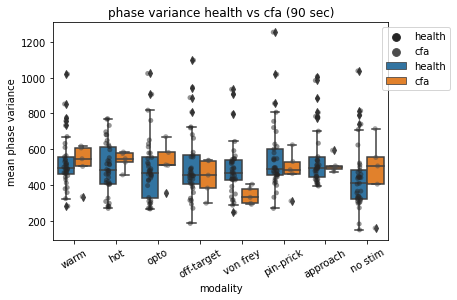

        Source  ddof1         H    p-unc
Kruskal    cfa      1  0.035079  0.85143


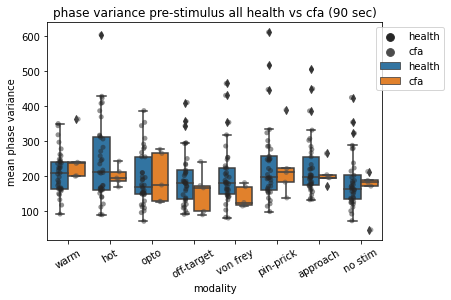

        Source  ddof1         H     p-unc
Kruskal    cfa      1  0.244281  0.621131


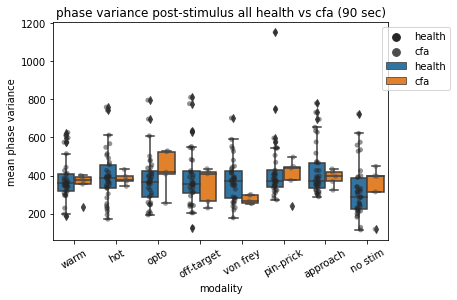

        Source  ddof1         H     p-unc
Kruskal    cfa      1  0.056447  0.812202


,session,modality,epoch,mean phase variance,mean phase distance,mouse,cfa
2,2P06_Ses01,warm,post,514.704466,927.108193,2P06,health
5,2P06_Ses01,hot,post,491.385815,911.840655,2P06,health
8,2P06_Ses01,opto,post,357.783654,630.131211,2P06,health
11,2P06_Ses01,off-target,post,551.999182,954.060378,2P06,health
14,2P06_Ses01,von frey,post,526.815039,940.181543,2P06,health


In [6]:
# Plot phase variance for health (all sessions) & cfa
phase_vars_full = phase_vars.loc[phase_vars['epoch']=='full']
phase_vars_pre = phase_vars.loc[phase_vars['epoch']=='pre']
phase_vars_post = phase_vars.loc[phase_vars['epoch']=='post']

ax = sns.stripplot(x="modality", y="mean phase variance", hue='cfa', data=phase_vars_full, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean phase variance", hue='cfa', data=phase_vars_full)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='phase variance health vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'phase variance all health vs cfa 90sec.png'), bbox_inches='tight')
plt.show()

print(pg.kruskal(data=phase_vars_full, dv="mean phase variance", between="cfa"))

ax = sns.stripplot(x="modality", y="mean phase variance", hue='cfa', data=phase_vars_pre, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean phase variance", hue='cfa', data=phase_vars_pre)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='phase variance pre-stimulus all health vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'phase variance pre-stimulus all health vs cfa (90sec).png'), bbox_inches='tight')
plt.show()

print(pg.kruskal(data=phase_vars_pre, dv="mean phase variance", between="cfa"))

ax = sns.stripplot(x="modality", y="mean phase variance", hue='cfa', data=phase_vars_post, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean phase variance", hue='cfa', data=phase_vars_post)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='phase variance post-stimulus all health vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'phase variance post-stimulus all health vs cfa (90 sec).png'), bbox_inches='tight')
plt.show()

print(pg.kruskal(data=phase_vars_post, dv="mean phase variance", between="cfa"))
phase_vars_post.head()

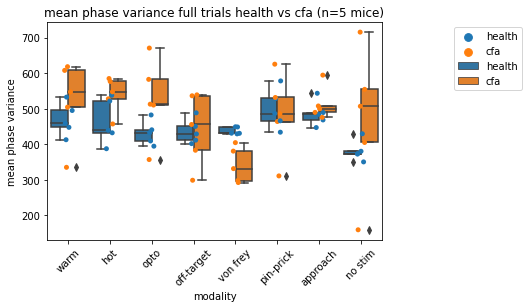

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
            Source         W  ddof1     Q     p-unc
Friedman  modality  0.491429      7  17.2  0.016151
no stim full trial phase variance:  4.0 0.4375
von frey full trial phase variance:  0.0 0.0625


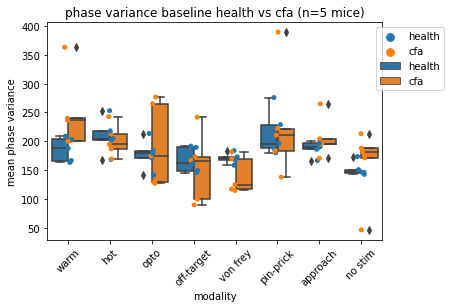

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
            Source        W  ddof1          Q     p-unc
Friedman  modality  0.56381      7  19.733333  0.006175
no stim baseline phase variance:  5.0 0.625
von frey baseline phase variance:  2.0 0.1875


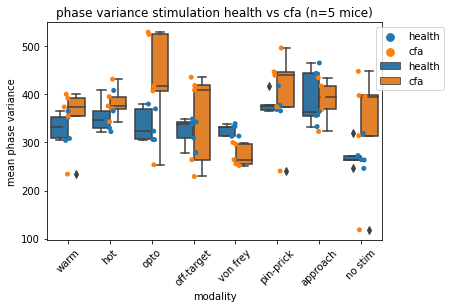

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
            Source         W  ddof1          Q     p-unc
Friedman  modality  0.579048      7  20.266667  0.005022
no stim stimulation phase variance:  3.0 0.3125
von frey stimulation phase variance:  0.0 0.0625


In [8]:
# PHASE VARIANCE FULL TRIAL CFA MICE ONLY 

stats_list = []
cols = ['mouse', 'modality', 'cfa', 'mean phase variance']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = phase_vars_full[phase_vars_full['session'].str.contains(m)]
    for s in stimuli:
        health = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='health')]['mean phase variance'].mean()
        cfa = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='cfa')]['mean phase variance'].mean()
        stats = [m, s, 'health', health]
        stats_list.append(stats)
        stats = [m, s, 'cfa', cfa]
        stats_list.append(stats)
   
stats_df = pd.DataFrame(stats_list, columns = cols)
stats_df.to_csv(os.path.join(output_path, 'stats by mouse phase variance full trial 90sec.csv'))
ax = sns.stripplot(x='modality', y='mean phase variance', hue='cfa', data=stats_df)
ax = sns.boxplot(x='modality', y='mean phase variance', hue='cfa', data=stats_df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
#plt.ylim(0.02, 0.1)
plt.title('mean phase variance full trials health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean phase variance full trials health vs cfa (n=5).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=stats_df, dv="mean phase variance", within="cfa", subject="mouse"))
print(pg.friedman(data=stats_df, dv="mean phase variance", within="modality", subject="mouse"))

noStim_health = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='health')]
noStim_cfa = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='cfa')]
d = np.array(noStim_health['mean phase variance']) - np.array(noStim_cfa['mean phase variance'])
res = wilcoxon(d)
print('no stim full trial phase variance: ', res.statistic, res.pvalue)

vf_health = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='health')]
vf_cfa = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='cfa')]
d = np.array(vf_health['mean phase variance']) - np.array(vf_cfa['mean phase variance'])
res = wilcoxon(d)
print('von frey full trial phase variance: ', res.statistic, res.pvalue)



# PHASE VARIANCE BASELINE CFA MICE ONLY 
stats_list = []
cols = ['mouse', 'modality', 'cfa', 'mean phase variance']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = phase_vars_pre[phase_vars_pre['session'].str.contains(m)]
    for s in stimuli:
        health = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='health')]['mean phase variance'].mean()
        cfa = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='cfa')]['mean phase variance'].mean()
        stats = [m, s, 'health', health]
        stats_list.append(stats)
        stats = [m, s, 'cfa', cfa]
        stats_list.append(stats)
   
stats_df = pd.DataFrame(stats_list, columns = cols)
stats_df.to_csv(os.path.join(output_path, 'stats by mouse phase variance baseline 90sec.csv'))
ax = sns.stripplot(x='modality', y='mean phase variance', hue='cfa', data=stats_df)
ax = sns.boxplot(x='modality', y='mean phase variance', hue='cfa', data=stats_df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
#plt.ylim(0.02, 0.1)
plt.title('phase variance baseline health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'phase variance baseline health vs cfa (n=5).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=stats_df, dv="mean phase variance", within="cfa", subject="mouse"))
print(pg.friedman(data=stats_df, dv="mean phase variance", within="modality", subject="mouse"))

noStim_health = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='health')]
noStim_cfa = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='cfa')]
d = np.array(noStim_health['mean phase variance']) - np.array(noStim_cfa['mean phase variance'])
res = wilcoxon(d)
print('no stim baseline phase variance: ', res.statistic, res.pvalue)

vf_health = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='health')]
vf_cfa = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='cfa')]
d = np.array(vf_health['mean phase variance']) - np.array(vf_cfa['mean phase variance'])
res = wilcoxon(d)
print('von frey baseline phase variance: ', res.statistic, res.pvalue)


# PHASE VARIANCE STIMULATION CFA MICE ONLY 
stats_list = []
cols = ['mouse', 'modality', 'cfa', 'mean phase variance']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = phase_vars_post[phase_vars_post['session'].str.contains(m)]
    for s in stimuli:
        health = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='health')]['mean phase variance'].mean()
        cfa = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='cfa')]['mean phase variance'].mean()
        stats = [m, s, 'health', health]
        stats_list.append(stats)
        stats = [m, s, 'cfa', cfa]
        stats_list.append(stats)
   
stats_df = pd.DataFrame(stats_list, columns = cols)
stats_df.to_csv(os.path.join(output_path, 'stats by mouse phase variance stimulation 90sec.csv'))
ax = sns.stripplot(x='modality', y='mean phase variance', hue='cfa', data=stats_df)
ax = sns.boxplot(x='modality', y='mean phase variance', hue='cfa', data=stats_df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
#plt.ylim(0.02, 0.1)
plt.title('phase variance stimulation health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'phase variance stimulation health vs cfa (n=5).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=stats_df, dv="mean phase variance", within="cfa", subject="mouse"))
print(pg.friedman(data=stats_df, dv="mean phase variance", within="modality", subject="mouse"))

noStim_health = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='health')]
noStim_cfa = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='cfa')]
d = np.array(noStim_health['mean phase variance']) - np.array(noStim_cfa['mean phase variance'])
res = wilcoxon(d)
print('no stim stimulation phase variance: ', res.statistic, res.pvalue)

vf_health = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='health')]
vf_cfa = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='cfa')]
d = np.array(vf_health['mean phase variance']) - np.array(vf_cfa['mean phase variance'])
res = wilcoxon(d)
print('von frey stimulation phase variance: ', res.statistic, res.pvalue)




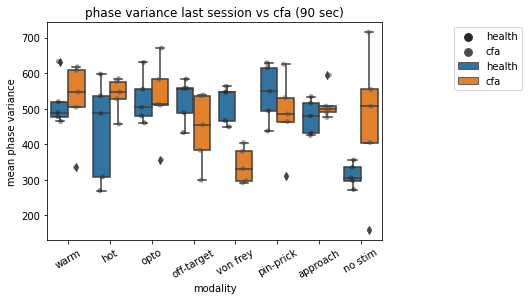

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
no stim full trial phase variance:  2.0 0.1875
von frey full trial phase variance:  0.0 0.0625


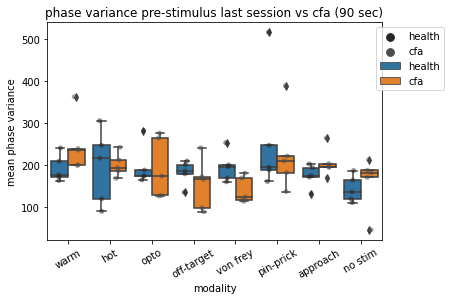

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
no stim baseline phase variance:  5.0 0.625
von frey baseline phase variance:  1.0 0.125


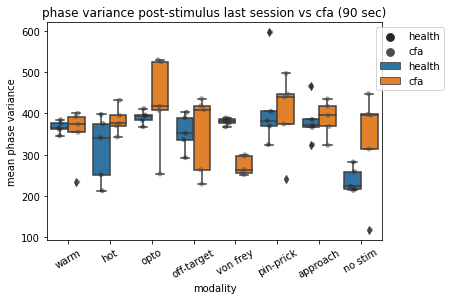

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
no stim stimulation phase variance:  2.0 0.1875
von frey stimulation phase variance:  0.0 0.0625


In [10]:
# Plot phase variance for health (last session) & cfa
# FULL TRACE
phase_vars_full = phase_vars_full.loc[phase_vars_full['session'].str.contains('CFA')|phase_vars_full['session'].isin(last_session)]
phase_vars_pre = phase_vars_pre.loc[phase_vars_pre['session'].str.contains('CFA')|phase_vars_pre['session'].isin(last_session)]
phase_vars_post = phase_vars_post.loc[phase_vars_post['session'].str.contains('CFA')|phase_vars_post['session'].isin(last_session)]

ax = sns.stripplot(x="modality", y="mean phase variance", hue='cfa', data=phase_vars_full, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean phase variance", hue='cfa', data=phase_vars_full)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='phase variance last session vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'phase variance last session vs cfa 90sec.png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=phase_vars_full, dv="mean phase variance", within="cfa", subject="mouse"))

noStim_health = phase_vars_full.loc[(phase_vars_full['modality']=='no stim') & (phase_vars_full['cfa']=='health')]
noStim_cfa = phase_vars_full.loc[(phase_vars_full['modality']=='no stim') & (phase_vars_full['cfa']=='cfa')]
d = np.array(noStim_health['mean phase variance']) - np.array(noStim_cfa['mean phase variance'])
res = wilcoxon(d)
print('no stim full trial phase variance: ', res.statistic, res.pvalue)

vf_health = phase_vars_full.loc[(phase_vars_full['modality']=='von frey') & (phase_vars_full['cfa']=='health')]
vf_cfa = phase_vars_full.loc[(phase_vars_full['modality']=='von frey') & (phase_vars_full['cfa']=='cfa')]
d = np.array(vf_health['mean phase variance']) - np.array(vf_cfa['mean phase variance'])
res = wilcoxon(d)
print('von frey full trial phase variance: ', res.statistic, res.pvalue)


# BASELINE
ax = sns.stripplot(x="modality", y="mean phase variance", hue='cfa', data=phase_vars_pre, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean phase variance", hue='cfa', data=phase_vars_pre)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='phase variance pre-stimulus last session vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'phase variance pre-stimulus last session vs cfa (90sec).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=phase_vars_pre, dv="mean phase variance", within="cfa", subject="mouse"))

noStim_health = phase_vars_pre.loc[(phase_vars_pre['modality']=='no stim') & (phase_vars_pre['cfa']=='health')]
noStim_cfa = phase_vars_pre.loc[(phase_vars_pre['modality']=='no stim') & (phase_vars_pre['cfa']=='cfa')]
d = np.array(noStim_health['mean phase variance']) - np.array(noStim_cfa['mean phase variance'])
res = wilcoxon(d)
print('no stim baseline phase variance: ', res.statistic, res.pvalue)

vf_health = phase_vars_pre.loc[(phase_vars_pre['modality']=='von frey') & (phase_vars_pre['cfa']=='health')]
vf_cfa = phase_vars_pre.loc[(phase_vars_pre['modality']=='von frey') & (phase_vars_pre['cfa']=='cfa')]
d = np.array(vf_health['mean phase variance']) - np.array(vf_cfa['mean phase variance'])
res = wilcoxon(d)
print('von frey baseline phase variance: ', res.statistic, res.pvalue)


# STIMULATION
ax = sns.stripplot(x="modality", y="mean phase variance", hue='cfa', data=phase_vars_post, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean phase variance", hue='cfa', data=phase_vars_post)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='phase variance post-stimulus last session vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'phase variance post-stimulus last session vs cfa (90 sec).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=phase_vars_post, dv="mean phase variance", within="cfa", subject="mouse"))

noStim_health = phase_vars_post.loc[(phase_vars_post['modality']=='no stim') & (phase_vars_post['cfa']=='health')]
noStim_cfa = phase_vars_post.loc[(phase_vars_post['modality']=='no stim') & (phase_vars_post['cfa']=='cfa')]
d = np.array(noStim_health['mean phase variance']) - np.array(noStim_cfa['mean phase variance'])
res = wilcoxon(d)
print('no stim stimulation phase variance: ', res.statistic, res.pvalue)

vf_health = phase_vars_post.loc[(phase_vars_post['modality']=='von frey') & (phase_vars_post['cfa']=='health')]
vf_cfa = phase_vars_post.loc[(phase_vars_post['modality']=='von frey') & (phase_vars_post['cfa']=='cfa')]
d = np.array(vf_health['mean phase variance']) - np.array(vf_cfa['mean phase variance'])
res = wilcoxon(d)
print('von frey stimulation phase variance: ', res.statistic, res.pvalue)


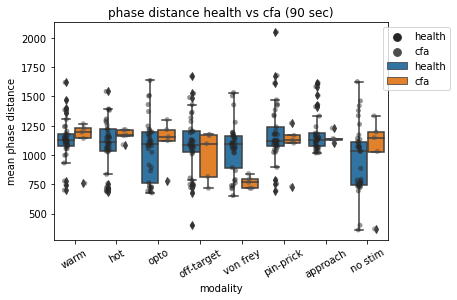

        Source  ddof1         H     p-unc
Kruskal    cfa      1  0.144241  0.704101


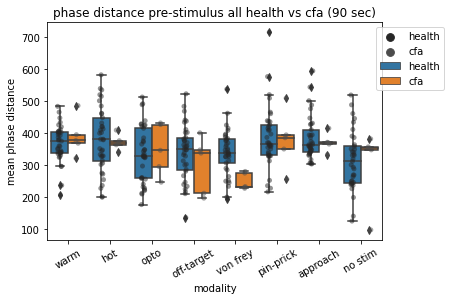

        Source  ddof1         H     p-unc
Kruskal    cfa      1  0.343584  0.557768


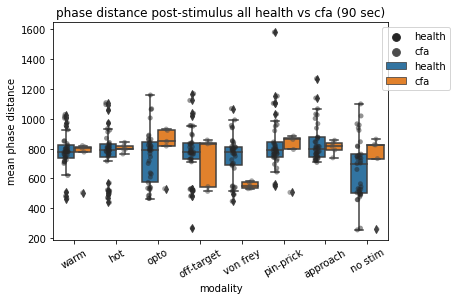

        Source  ddof1         H     p-unc
Kruskal    cfa      1  0.251186  0.616241


In [11]:
# Plot phase distance for health (all sessions) & cfa
phase_vars_full = phase_vars.loc[phase_vars['epoch']=='full']
phase_vars_pre = phase_vars.loc[phase_vars['epoch']=='pre']
phase_vars_post = phase_vars.loc[phase_vars['epoch']=='post']

ax = sns.stripplot(x="modality", y="mean phase distance", hue='cfa', data=phase_vars_full, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean phase distance", hue='cfa', data=phase_vars_full)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='phase distance health vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'phase distance all health vs cfa 90sec.png'), bbox_inches='tight')
plt.show()

print(pg.kruskal(data=phase_vars_full, dv="mean phase distance", between="cfa"))

ax = sns.stripplot(x="modality", y="mean phase distance", hue='cfa', data=phase_vars_pre, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean phase distance", hue='cfa', data=phase_vars_pre)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='phase distance pre-stimulus all health vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'phase distance pre-stimulus all health vs cfa (90sec).png'), bbox_inches='tight')
plt.show()

print(pg.kruskal(data=phase_vars_pre, dv="mean phase distance", between="cfa"))

ax = sns.stripplot(x="modality", y="mean phase distance", hue='cfa', data=phase_vars_post, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean phase distance", hue='cfa', data=phase_vars_post)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='phase distance post-stimulus all health vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'phase distance post-stimulus all health vs cfa (90 sec).png'), bbox_inches='tight')
plt.show()

print(pg.kruskal(data=phase_vars_post, dv="mean phase distance", between="cfa"))


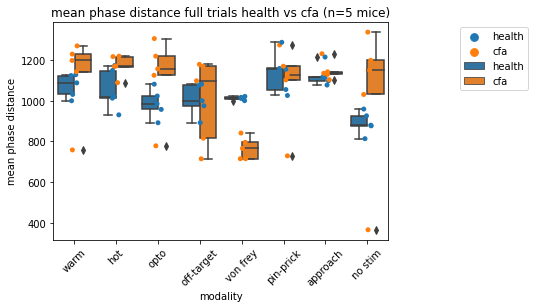

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
            Source         W  ddof1          Q     p-unc
Friedman  modality  0.573333      7  20.066667  0.005427
no stim full trial phase distance:  5.0 0.625
von frey full trial phase distance:  0.0 0.0625


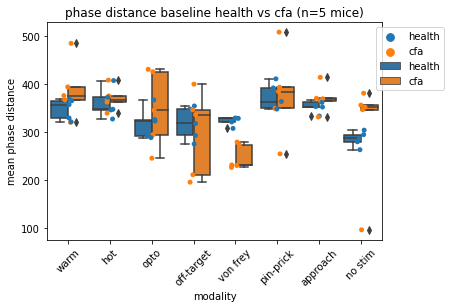

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
            Source         W  ddof1          Q     p-unc
Friedman  modality  0.567619      7  19.866667  0.005865
no stim baseline phase variance:  5.0 0.625
von frey baseline phase variance:  0.0 0.0625


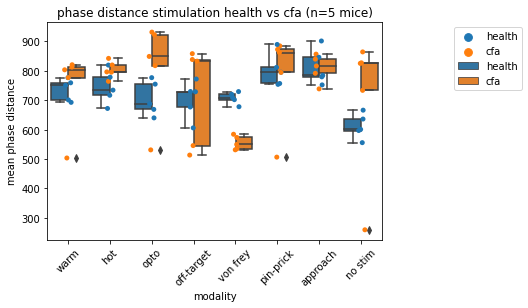

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
            Source         W  ddof1          Q     p-unc
Friedman  modality  0.584762      7  20.466667  0.004645
no stim stimulation phase distance:  5.0 0.625
von frey stimulation phase distance:  0.0 0.0625


In [12]:
# PHASE DISTANCE FULL TRIAL CFA MICE ONLY 

stats_list = []
cols = ['mouse', 'modality', 'cfa', 'mean phase distance']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = phase_vars_full[phase_vars_full['session'].str.contains(m)]
    for s in stimuli:
        health = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='health')]['mean phase distance'].mean()
        cfa = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='cfa')]['mean phase distance'].mean()
        stats = [m, s, 'health', health]
        stats_list.append(stats)
        stats = [m, s, 'cfa', cfa]
        stats_list.append(stats)
   
stats_df = pd.DataFrame(stats_list, columns = cols)
stats_df.to_csv(os.path.join(output_path, 'stats by mouse phase distance full trial 90sec.csv'))
ax = sns.stripplot(x='modality', y='mean phase distance', hue='cfa', data=stats_df)
ax = sns.boxplot(x='modality', y='mean phase distance', hue='cfa', data=stats_df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
#plt.ylim(0.02, 0.1)
plt.title('mean phase distance full trials health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean phase distance full trials health vs cfa (n=5).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=stats_df, dv="mean phase distance", within="cfa", subject="mouse"))
print(pg.friedman(data=stats_df, dv="mean phase distance", within="modality", subject="mouse"))

noStim_health = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='health')]
noStim_cfa = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='cfa')]
d = np.array(noStim_health['mean phase distance']) - np.array(noStim_cfa['mean phase distance'])
res = wilcoxon(d)
print('no stim full trial phase distance: ', res.statistic, res.pvalue)

vf_health = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='health')]
vf_cfa = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='cfa')]
d = np.array(vf_health['mean phase distance']) - np.array(vf_cfa['mean phase distance'])
res = wilcoxon(d)
print('von frey full trial phase distance: ', res.statistic, res.pvalue)


# PHASE DISTANCE BASELINE CFA MICE ONLY 
stats_list = []
for m in mice:
    by_mouse = phase_vars_pre[phase_vars_pre['session'].str.contains(m)]
    for s in stimuli:
        health = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='health')]['mean phase distance'].mean()
        cfa = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='cfa')]['mean phase distance'].mean()
        stats = [m, s, 'health', health]
        stats_list.append(stats)
        stats = [m, s, 'cfa', cfa]
        stats_list.append(stats)
   
stats_df = pd.DataFrame(stats_list, columns = cols)
stats_df.to_csv(os.path.join(output_path, 'stats by mouse phase distance baseline 90sec.csv'))
ax = sns.stripplot(x='modality', y='mean phase distance', hue='cfa', data=stats_df)
ax = sns.boxplot(x='modality', y='mean phase distance', hue='cfa', data=stats_df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
#plt.ylim(0.02, 0.1)
plt.title('phase distance baseline health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'phase distance baseline health vs cfa (n=5).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=stats_df, dv="mean phase distance", within="cfa", subject="mouse"))
print(pg.friedman(data=stats_df, dv="mean phase distance", within="modality", subject="mouse"))

noStim_health = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='health')]
noStim_cfa = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='cfa')]
d = np.array(noStim_health['mean phase distance']) - np.array(noStim_cfa['mean phase distance'])
res = wilcoxon(d)
print('no stim baseline phase variance: ', res.statistic, res.pvalue)

vf_health = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='health')]
vf_cfa = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='cfa')]
d = np.array(vf_health['mean phase distance']) - np.array(vf_cfa['mean phase distance'])
res = wilcoxon(d)
print('von frey baseline phase variance: ', res.statistic, res.pvalue)


# PHASE DISTANCE STIMULATION CFA MICE ONLY 
stats_list = []
for m in mice:
    by_mouse = phase_vars_post[phase_vars_post['session'].str.contains(m)]
    for s in stimuli:
        health = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='health')]['mean phase distance'].mean()
        cfa = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='cfa')]['mean phase distance'].mean()
        stats = [m, s, 'health', health]
        stats_list.append(stats)
        stats = [m, s, 'cfa', cfa]
        stats_list.append(stats)
   
stats_df = pd.DataFrame(stats_list, columns = cols)
stats_df.to_csv(os.path.join(output_path, 'stats by mouse phase distance stimulation 90sec.csv'))
ax = sns.stripplot(x='modality', y='mean phase distance', hue='cfa', data=stats_df)
ax = sns.boxplot(x='modality', y='mean phase distance', hue='cfa', data=stats_df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
#plt.ylim(0.02, 0.1)
plt.title('phase distance stimulation health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'phase distance stimulation health vs cfa (n=5).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=stats_df, dv="mean phase distance", within="cfa", subject="mouse"))
print(pg.friedman(data=stats_df, dv="mean phase distance", within="modality", subject="mouse"))

noStim_health = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='health')]
noStim_cfa = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='cfa')]
d = np.array(noStim_health['mean phase distance']) - np.array(noStim_cfa['mean phase distance'])
res = wilcoxon(d)
print('no stim stimulation phase distance: ', res.statistic, res.pvalue)

vf_health = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='health')]
noStim_cfa = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='cfa')]
d = np.array(vf_health['mean phase distance']) - np.array(vf_cfa['mean phase distance'])
res = wilcoxon(d)
print('von frey stimulation phase distance: ', res.statistic, res.pvalue)



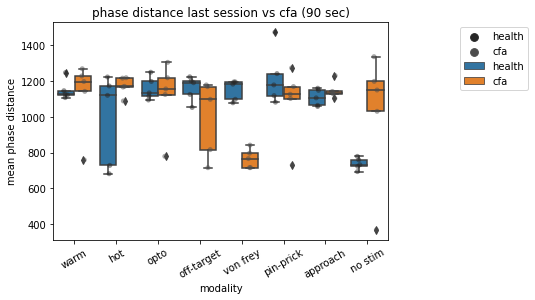

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
no stim full trial phase distance:  2.0 0.1875
von frey full trial phase distance:  0.0 0.0625


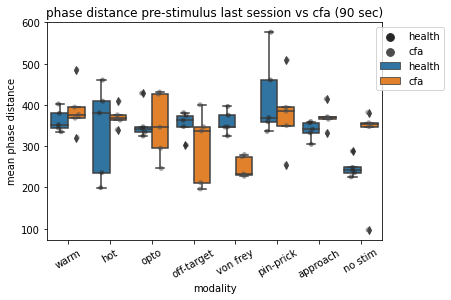

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
no stim baseline phase distance:  5.0 0.625
von frey baseline phase distance:  0.0 0.0625


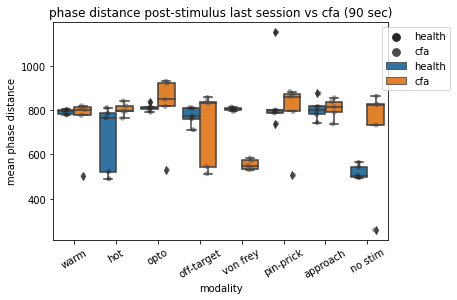

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
no stim stimulation phase distance:  2.0 0.1875
von frey stimulation phase distance:  0.0 0.0625


In [13]:
# Plot phase distance for health (last session) & cfa
phase_vars_full = phase_vars_full.loc[phase_vars_full['session'].str.contains('CFA')|phase_vars_full['session'].isin(last_session)]
phase_vars_pre = phase_vars_pre.loc[phase_vars_pre['session'].str.contains('CFA')|phase_vars_pre['session'].isin(last_session)]
phase_vars_post = phase_vars_post.loc[phase_vars_post['session'].str.contains('CFA')|phase_vars_post['session'].isin(last_session)]

ax = sns.stripplot(x="modality", y="mean phase distance", hue='cfa', data=phase_vars_full, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean phase distance", hue='cfa', data=phase_vars_full)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='phase distance last session vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'phase distance last session vs cfa 90sec.png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=phase_vars_full, dv="mean phase distance", within="cfa", subject="mouse"))

noStim_health = phase_vars_full.loc[(phase_vars_full['modality']=='no stim') & (phase_vars_full['cfa']=='health')]
noStim_cfa = phase_vars_full.loc[(phase_vars_full['modality']=='no stim') & (phase_vars_full['cfa']=='cfa')]
d = np.array(noStim_health['mean phase distance']) - np.array(noStim_cfa['mean phase distance'])
res = wilcoxon(d)
print('no stim full trial phase distance: ', res.statistic, res.pvalue)

vf_health = phase_vars_full.loc[(phase_vars_full['modality']=='von frey') & (phase_vars_full['cfa']=='health')]
vf_cfa = phase_vars_full.loc[(phase_vars_full['modality']=='von frey') & (phase_vars_full['cfa']=='cfa')]
d = np.array(vf_health['mean phase distance']) - np.array(vf_cfa['mean phase distance'])
res = wilcoxon(d)
print('von frey full trial phase distance: ', res.statistic, res.pvalue)


ax = sns.stripplot(x="modality", y="mean phase distance", hue='cfa', data=phase_vars_pre, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean phase distance", hue='cfa', data=phase_vars_pre)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='phase distance pre-stimulus last session vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'phase distance pre-stimulus last session vs cfa (90sec).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=phase_vars_pre, dv="mean phase distance", within="cfa", subject="mouse"))

noStim_health = phase_vars_pre.loc[(phase_vars_pre['modality']=='no stim') & (phase_vars_pre['cfa']=='health')]
noStim_cfa = phase_vars_pre.loc[(phase_vars_pre['modality']=='no stim') & (phase_vars_pre['cfa']=='cfa')]
d = np.array(noStim_health['mean phase distance']) - np.array(noStim_cfa['mean phase distance'])
res = wilcoxon(d)
print('no stim baseline phase distance: ', res.statistic, res.pvalue)

vf_health = phase_vars_pre.loc[(phase_vars_pre['modality']=='von frey') & (phase_vars_pre['cfa']=='health')]
vf_cfa = phase_vars_pre.loc[(phase_vars_pre['modality']=='von frey') & (phase_vars_pre['cfa']=='cfa')]
d = np.array(vf_health['mean phase distance']) - np.array(vf_cfa['mean phase distance'])
res = wilcoxon(d)
print('von frey baseline phase distance: ', res.statistic, res.pvalue)


ax = sns.stripplot(x="modality", y="mean phase distance", hue='cfa', data=phase_vars_post, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean phase distance", hue='cfa', data=phase_vars_post)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#plt.ylim(0,25)
ax.set(title='phase distance post-stimulus last session vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'phase distance post-stimulus last session vs cfa (90 sec).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=phase_vars_post, dv="mean phase distance", within="cfa", subject="mouse"))

noStim_health = phase_vars_post.loc[(phase_vars_post['modality']=='no stim') & (phase_vars_post['cfa']=='health')]
noStim_cfa = phase_vars_post.loc[(phase_vars_post['modality']=='no stim') & (phase_vars_post['cfa']=='cfa')]
d = np.array(noStim_health['mean phase distance']) - np.array(noStim_cfa['mean phase distance'])
res = wilcoxon(d)
print('no stim stimulation phase distance: ', res.statistic, res.pvalue)

vf_health = phase_vars_post.loc[(phase_vars_post['modality']=='von frey') & (phase_vars_post['cfa']=='health')]
vf_cfa = phase_vars_post.loc[(phase_vars_post['modality']=='von frey') & (phase_vars_post['cfa']=='cfa')]
d = np.array(vf_health['mean phase distance']) - np.array(vf_cfa['mean phase distance'])
res = wilcoxon(d)
print('von frey stimulation phase distance: ', res.statistic, res.pvalue)

